In [1]:
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline

In [3]:
#Parameters

#IFO
L = 3995
T = 0.014
m = 40
loss_rt = 150e-6 #arm rt loss

#Power
Pin = 429.8967222619745

#constants
c = 3.e8
hbar = 1.05457e-34
lam = 1064e-9
w0 = (2 * np.pi * c) / lam

#freq
f_sm = np.arange(1e-1, 10,0.1)
f_prmi = np.arange(1, 1e5,1)
f_pole = (T*c)/ (4*L)

# Losses
c_loss = (2 * loss_rt) / T #arm loss coeff
ot_loss = 0.05  #fractional photon loss in optical train
arm_loss = (2*c_loss) / (1 + (f_prmi/f_pole)**2 ) # fractional photon loss in output train

In [4]:
def add_squeezing(psd,R,theta,phi):
    psd_out = psd* (np.cosh(2*R) - (np.cos(2*(phi+theta)) * np.sinh(2*R)))
    return psd_out

In [5]:
(T*c)/ (4*L)

262.828535669587

In [6]:
f_pole

262.828535669587

In [8]:
#simple MIchelson
h_sql_sm = np.sqrt( (4.*hbar) / (m * L**2))

h_sql_sm_f = np.sqrt( (4.*hbar) / (m * f_sm**2 * L**2))

kappa_sm = (4*Pin * w0 )/ (m * c**2 * f_sm**2)

shot_noise_sm = (h_sql_sm_f**2 / 2.)*(1./kappa_sm)

rad_pres_sm = (h_sql_sm_f**2 / 2.)* (kappa_sm)

#s_psd_sm = (h_sql_sm_f**2 / 2.)*( (kappa_sm) +(1./kappa_sm) )

s_psd_sm = shot_noise_sm + rad_pres_sm

#add squeezing
R = 1.5
theta = 0
phi = np.arctan(1/kappa_sm)

s_psd_sm_sqz_sn  = add_squeezing(s_psd_sm,R,-np.pi/2,phi)
s_psd_sm_sqz_rp  = add_squeezing(s_psd_sm,R,0,phi)
s_psd_sm_sqz_mid = add_squeezing(s_psd_sm,R,-np.pi/4,phi)
s_psd_sm_sqz_opt = add_squeezing(s_psd_sm,R,-phi,phi)

In [10]:
Psql = (m * L**2 * f_pole**4 ) / (4*w0)

kappa  = ( 2 * (Pin/Psql) * f_pole**4 ) / (f_prmi**2 * ( f_pole**2 + f_prmi **2))

h_sql = np.sqrt(8.*hbar / (m * f_prmi**2 * L**2))

rad_prs_prmi = (h_sql**2/2.) * kappa

sht_nse_prmi = (h_sql**2/2.) * (1./kappa)

h_asd =  np.sqrt( sht_nse_prmi + rad_prs_prmi)

#add squeezing
R = 1.5
theta = 0
phi = np.arctan(1/kappa)

s_psd_sqz_sn  = add_squeezing(h_asd**2,R,-np.pi/2,phi)
s_psd_sqz_rp  = add_squeezing(h_asd**2,R,0,phi)
s_psd_sqz_mid = add_squeezing(h_asd**2,R,-np.pi/4,phi)
s_psd_sqz_opt = add_squeezing(h_asd**2,R,-phi,phi)

In [11]:
Psql

429.8967222619745

In [12]:
# tune the input power to the powee of the sql

kappa_test  = ( 2 * (Pin/Psql) * f_pole**4 ) / (f_pole**2 * ( f_pole**2 + f_pole **2))
kappa_test

1.0

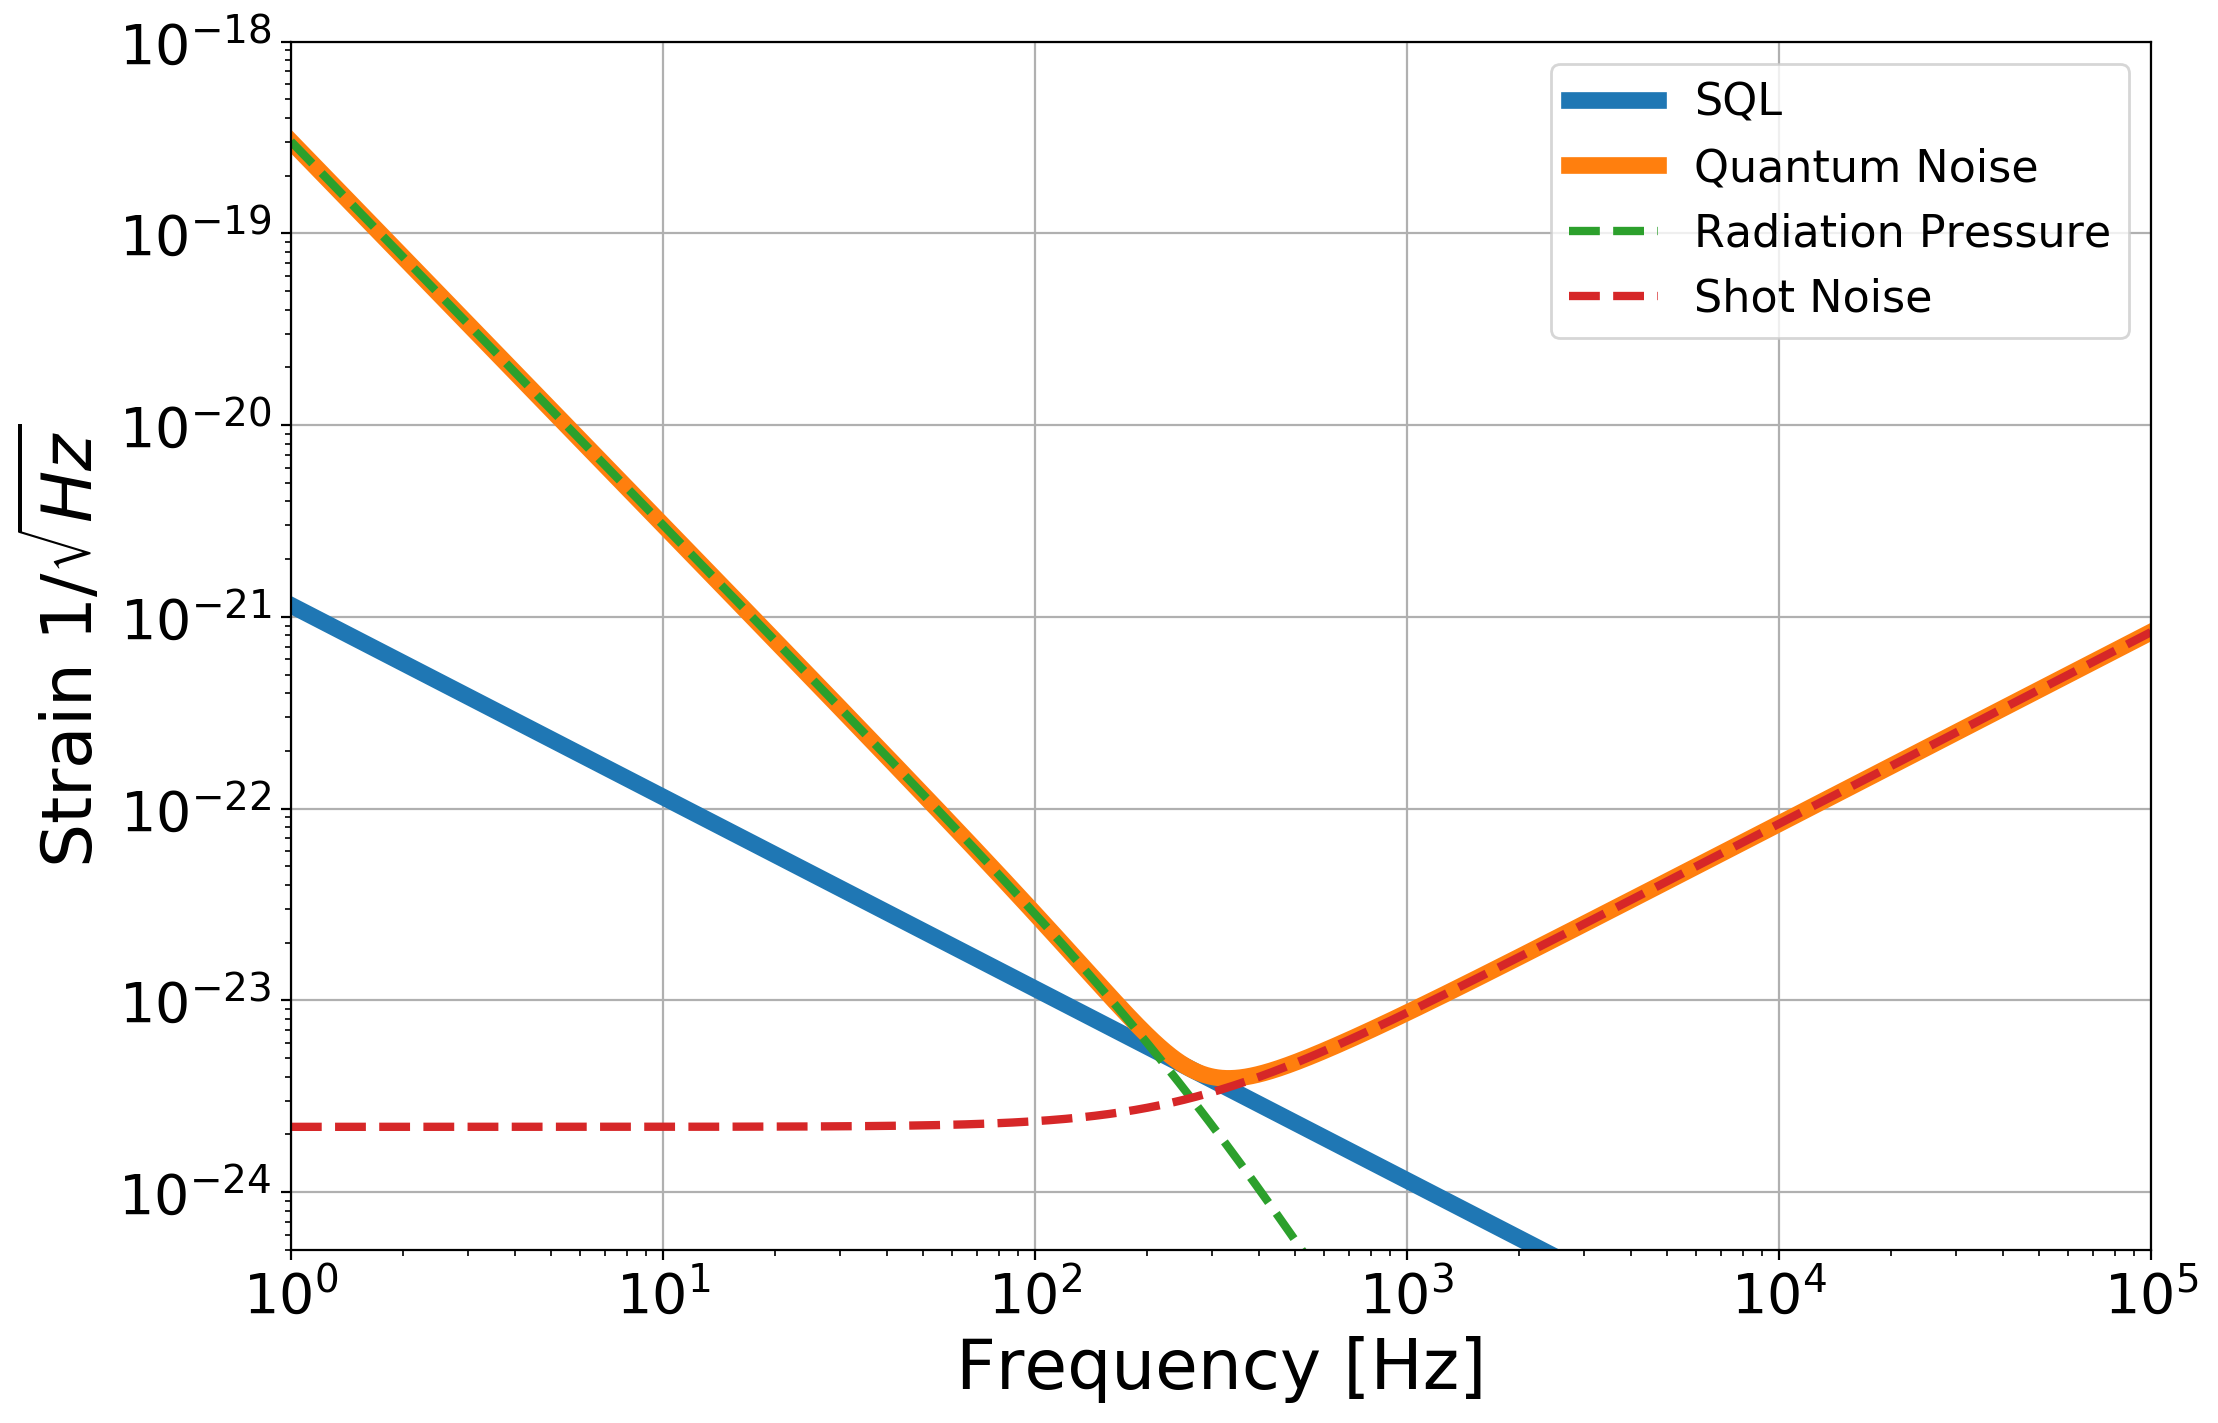

In [13]:
fig = pl.figure(figsize = (12,8),dpi=200)

ax = fig.add_subplot(111)

ax.loglog(f_prmi,h_sql,linewidth=6, label = 'SQL') 
ax.loglog(f_prmi,h_asd,linewidth=6, label = 'Quantum Noise')
ax.loglog(f_prmi,np.sqrt(rad_prs_prmi),'--',linewidth=3, label='Radiation Pressure')
ax.loglog(f_prmi,np.sqrt(sht_nse_prmi),'--',linewidth=3, label='Shot Noise')

ax.legend()
ax.set_xlim(1, 1e5)
ax.set_ylim(5e-25, 1e-18)

ax.legend(prop={'size': 16})

ax.set_xlabel('Frequency [Hz]', fontsize = 25)
ax.set_ylabel('Strain $1/\sqrt{Hz}$',fontsize =25)
ax.tick_params(labelsize=20)

ax.grid()

fig.savefig('../../Figures/Kimble_PRFPMI_QM.png')

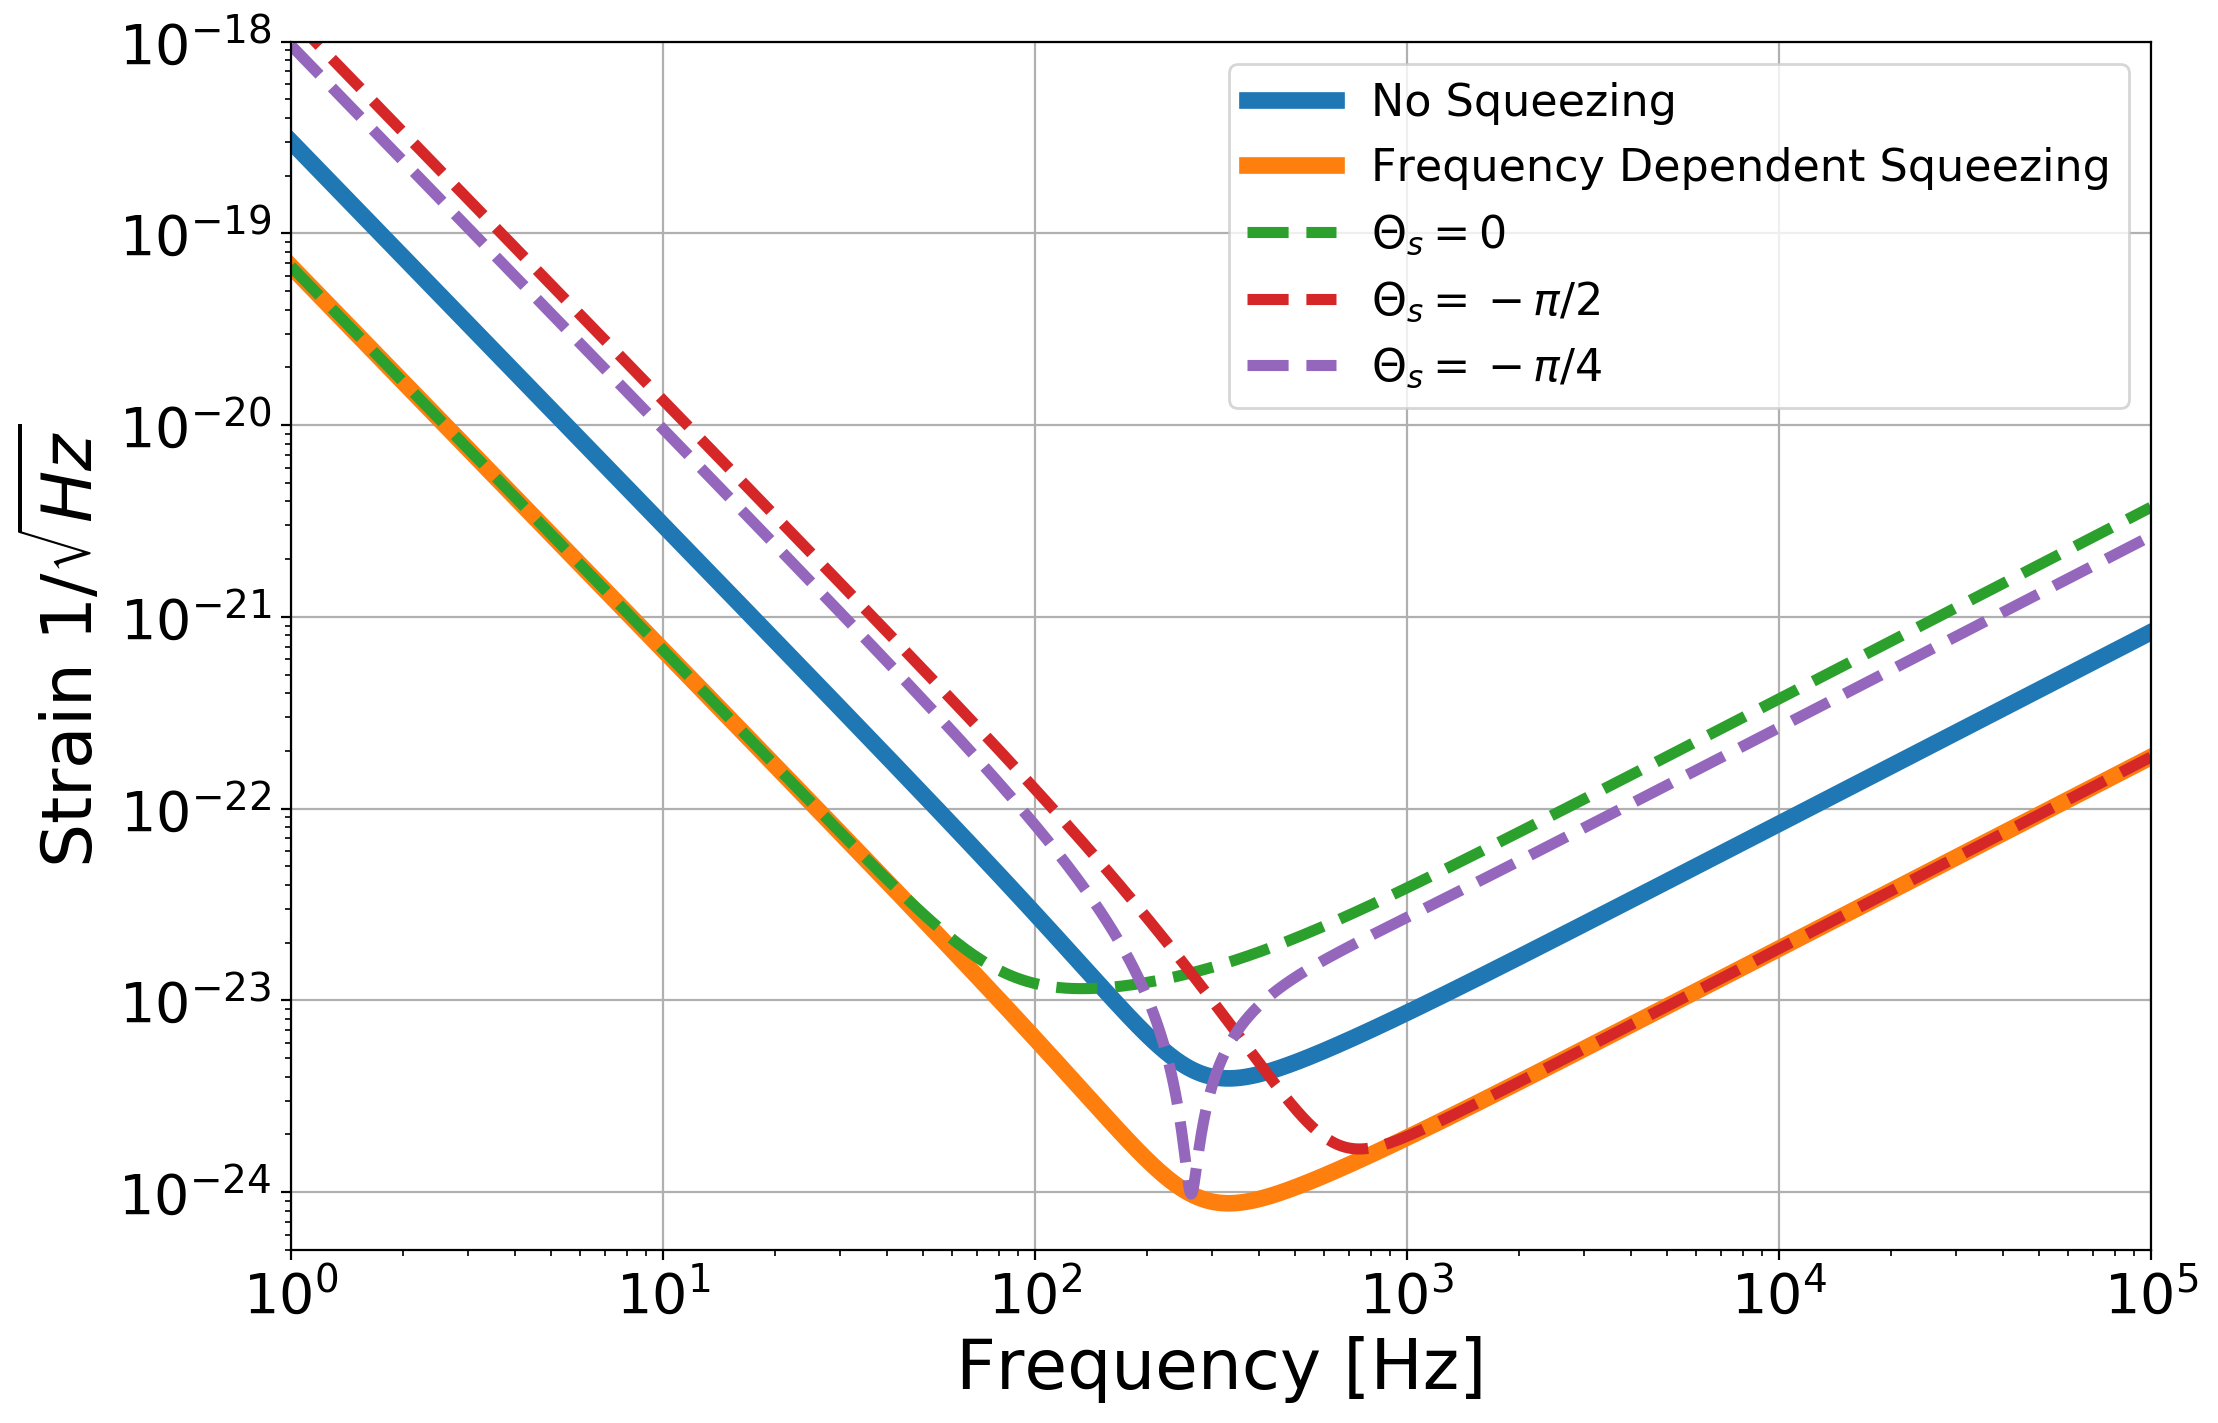

In [14]:
fig = pl.figure(figsize = (12,8),dpi=200)

ax = fig.add_subplot(111)

#ax.loglog(f_prmi,h_sql,linewidth=2, label = 'SQL') 
ax.loglog(f_prmi,h_asd,linewidth=6, label = 'No Squeezing')
ax.loglog(f_prmi,np.sqrt(s_psd_sqz_opt),linewidth=6, label = 'Frequency Dependent Squeezing')
ax.loglog(f_prmi,np.sqrt(s_psd_sqz_rp),'--',linewidth=4, label = '$\Theta_s = 0$')
ax.loglog(f_prmi,np.sqrt(s_psd_sqz_sn),'--',linewidth=4, label = '$\Theta_s = -\pi/2$')
ax.loglog(f_prmi,np.sqrt(s_psd_sqz_mid),'--',linewidth=4, label = '$\Theta_s = -\pi/4$')

ax.legend()
ax.set_xlim(1, 1e5)
ax.set_ylim(5e-25, 1e-18)

ax.legend(prop={'size': 16})

ax.set_xlabel('Frequency [Hz]', fontsize = 25)
ax.set_ylabel('Strain $1/\sqrt{Hz}$',fontsize =25)
ax.tick_params(labelsize=20)

ax.grid()
fig.savefig('../../Figures/Kimble_PRFPMI_QM_Sqz.png')

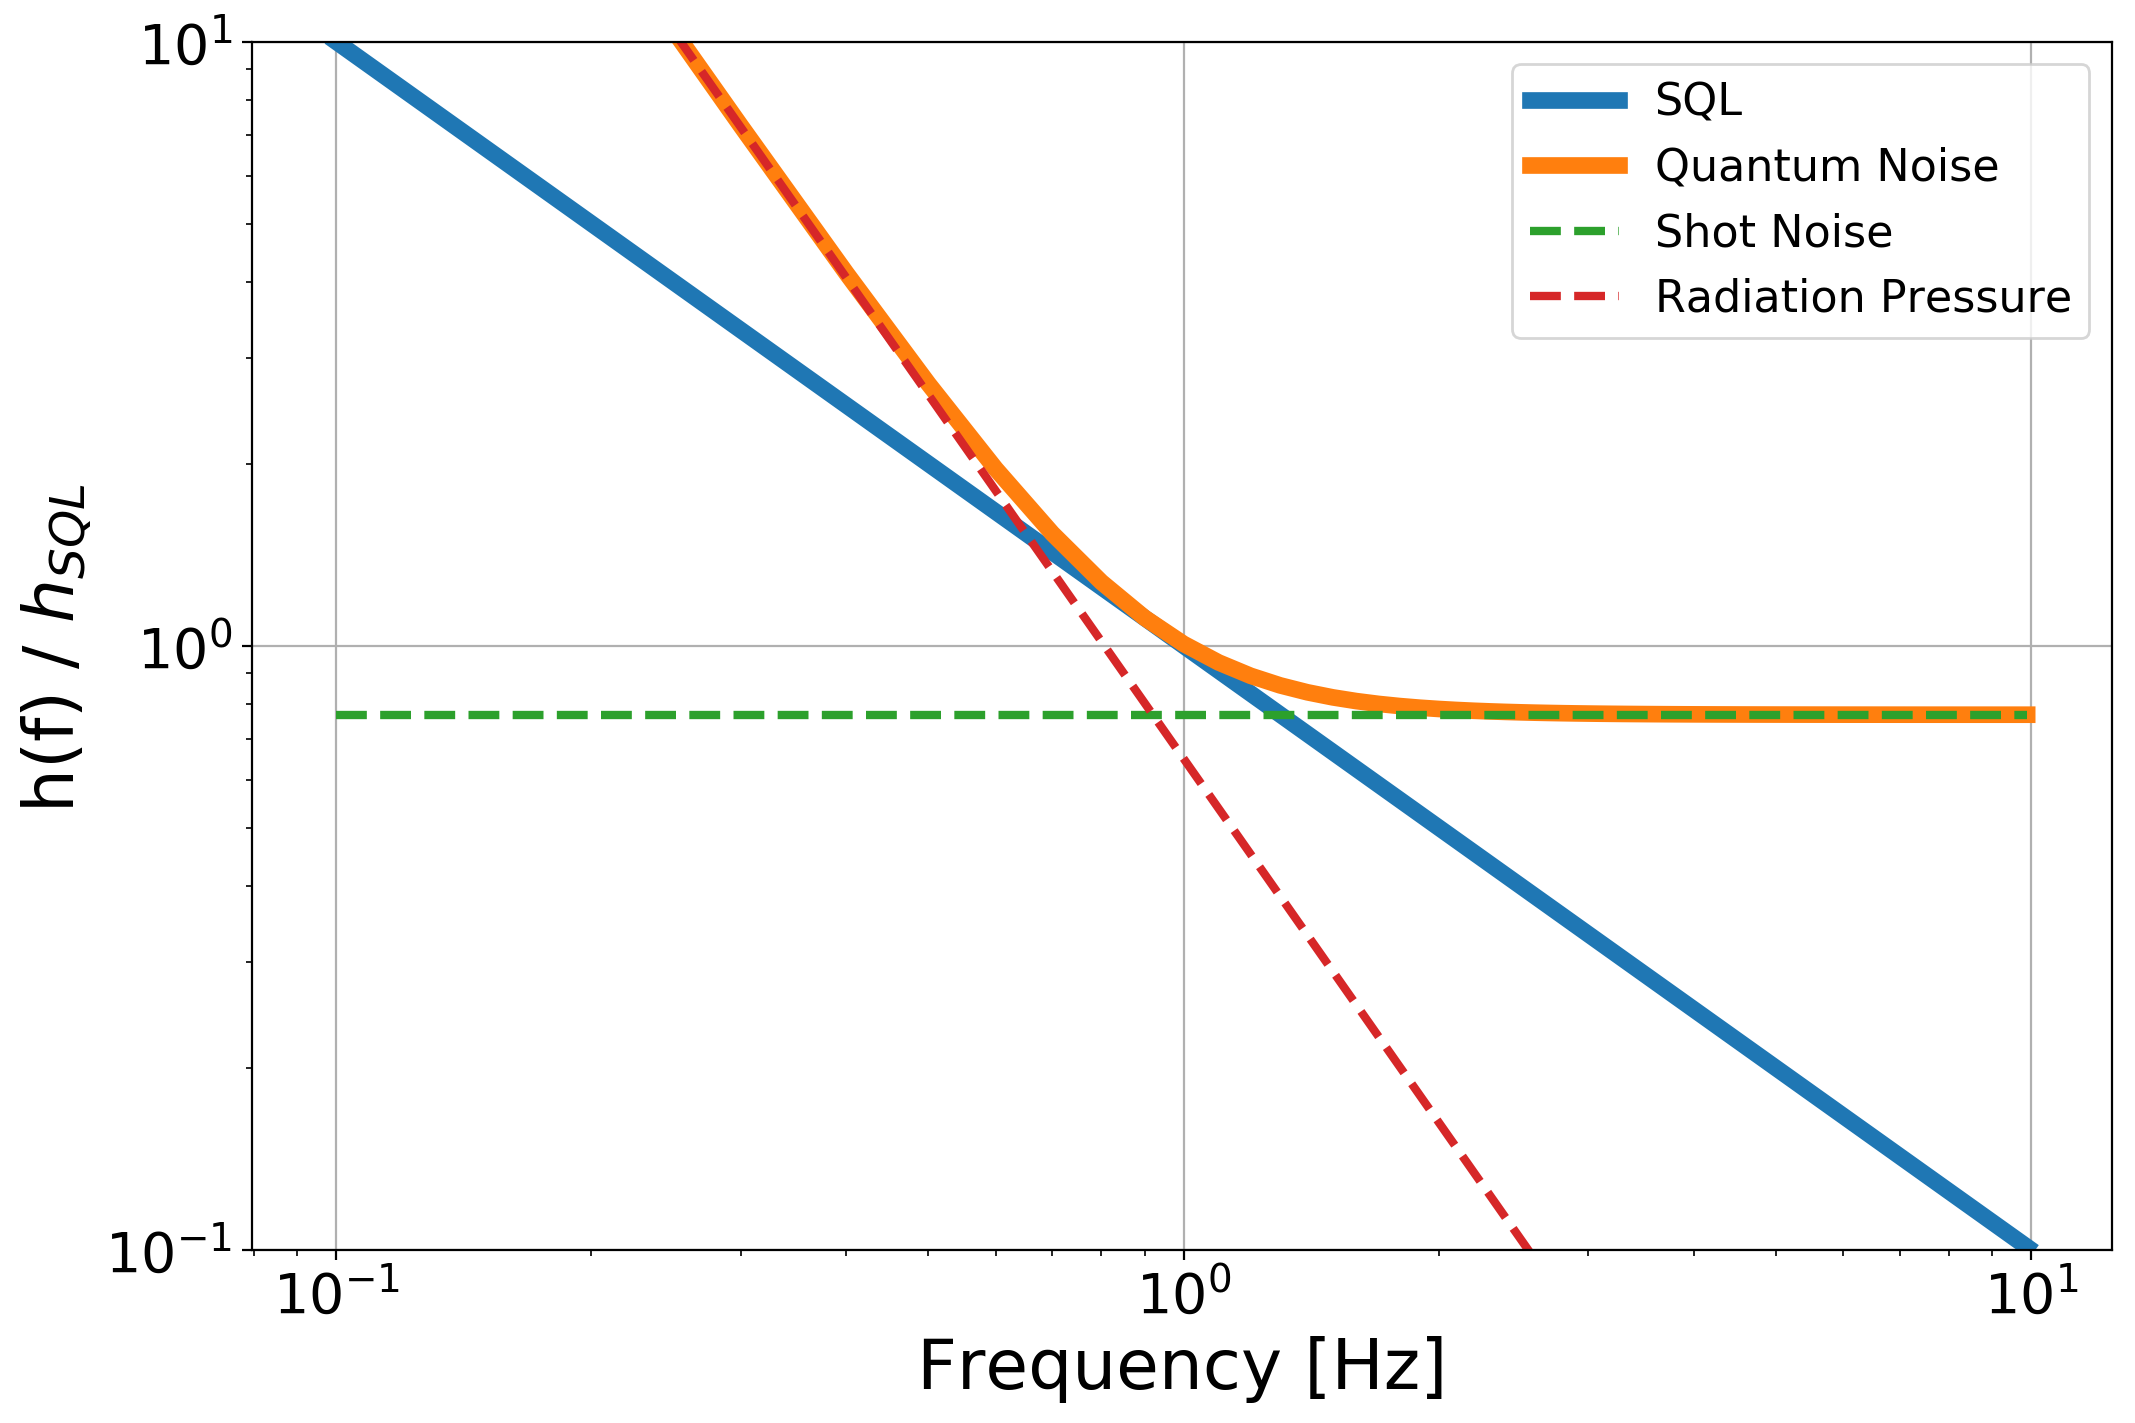

In [16]:
fig = pl.figure(figsize = (12,8),dpi=200)

ax = fig.add_subplot(111)

ax.loglog(f_sm,h_sql_sm_f/h_sql_sm,linewidth=6, label = 'SQL') 
ax.loglog(f_sm,np.sqrt(s_psd_sm)/h_sql_sm,linewidth=6,label='Quantum Noise')
ax.loglog(f_sm,np.sqrt(shot_noise_sm)/h_sql_sm,'--',linewidth=3,label = 'Shot Noise')
ax.loglog(f_sm,np.sqrt(rad_pres_sm)/h_sql_sm,'--',linewidth=3,label='Radiation Pressure')


ax.set_ylim(0.1,10)

ax.legend(prop={'size': 16})

ax.set_xlabel('Frequency [Hz]', fontsize = 25)
ax.set_ylabel('h(f) / $h_{SQL}$ ',fontsize =25)
ax.tick_params(labelsize=20)
ax.grid()

fig.savefig('../../Figures/Kimble_SM_QM.png')

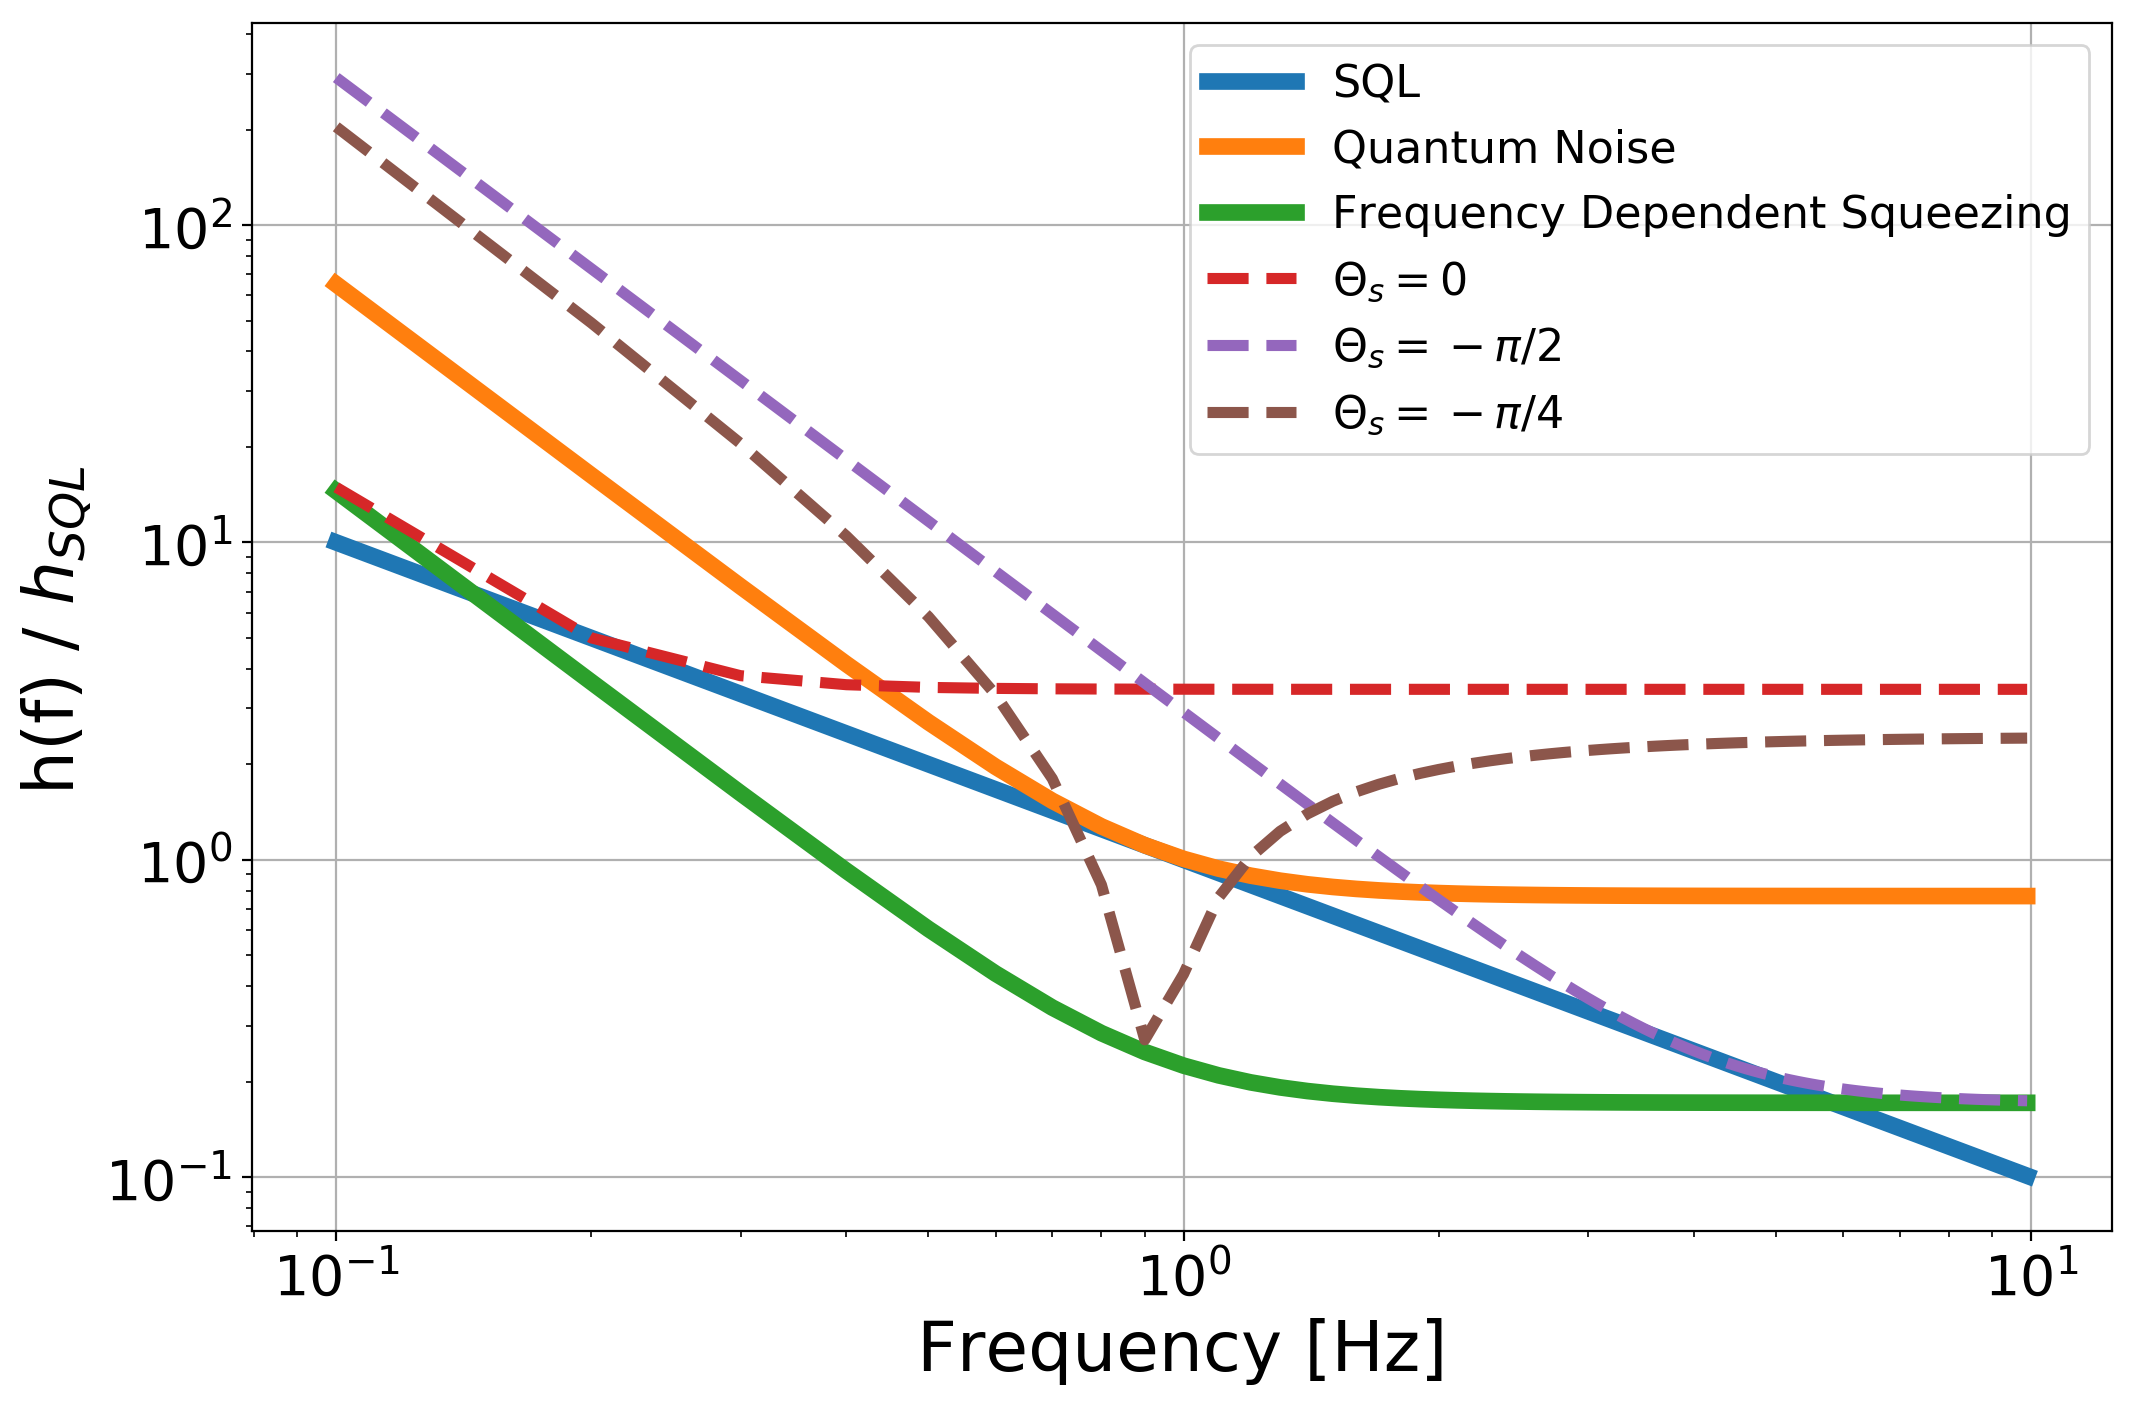

In [18]:
fig = pl.figure(figsize = (12,8),dpi=200)

ax = fig.add_subplot(111)

ax.loglog(f_sm,h_sql_sm_f/h_sql_sm,linewidth=6, label = 'SQL') 
ax.loglog(f_sm,np.sqrt(s_psd_sm)/h_sql_sm,linewidth=6,label='Quantum Noise')
ax.loglog(f_sm,np.sqrt(s_psd_sm_sqz_opt)/h_sql_sm,linewidth=6, label = 'Frequency Dependent Squeezing')
ax.loglog(f_sm,np.sqrt(s_psd_sm_sqz_rp)/h_sql_sm,'--',linewidth=4, label = '$\Theta_s = 0$')
ax.loglog(f_sm,np.sqrt(s_psd_sm_sqz_sn)/h_sql_sm,'--',linewidth=4, label = '$\Theta_s = -\pi/2$')
ax.loglog(f_sm,np.sqrt(s_psd_sm_sqz_mid)/h_sql_sm,'--',linewidth=4, label = '$\Theta_s = -\pi/4$')

#ax.set_ylim(0.1,10)

ax.legend(prop={'size': 16})

ax.set_xlabel('Frequency [Hz]', fontsize = 25)
ax.set_ylabel('h(f) / $h_{SQL}$ ',fontsize =25)
ax.tick_params(labelsize=20)
ax.grid()

fig.savefig('../../Figures/Kimble_SM_QM_sqz.png')